## Modeling Exercise



In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from pydataset import data

import warnings
warnings.filterwarnings('ignore')

### 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

- a. Choose features other than the ones used in the lesson.
- b. Visualize the results of your clustering.
- c. Use the elbow method to visually select a good value for k.
- d. Repeat the clustering, this time with 3 different features.


Acquire

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


Prepare

In [3]:
new_col_names = []

for col in df.columns:
    new_col_names.append(col.lower().replace('.', '_'))
    
df.columns = new_col_names

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
X = df[['petal_length', 'petal_width']]
X.head()

,petal_length,petal_width
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2


Model

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [6]:
df['cluster'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,2
2,4.9,3.0,1.4,0.2,setosa,2
3,4.7,3.2,1.3,0.2,setosa,2
4,4.6,3.1,1.5,0.2,setosa,2
5,5.0,3.6,1.4,0.2,setosa,2


In [7]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.006,3.428,1.462,0.246,2.00
versicolor,5.936,2.770,4.260,1.326,0.04
virginica,6.588,2.974,5.552,2.026,0.92


[Text(0.5, 1.0, 'K-Means Clusters')]

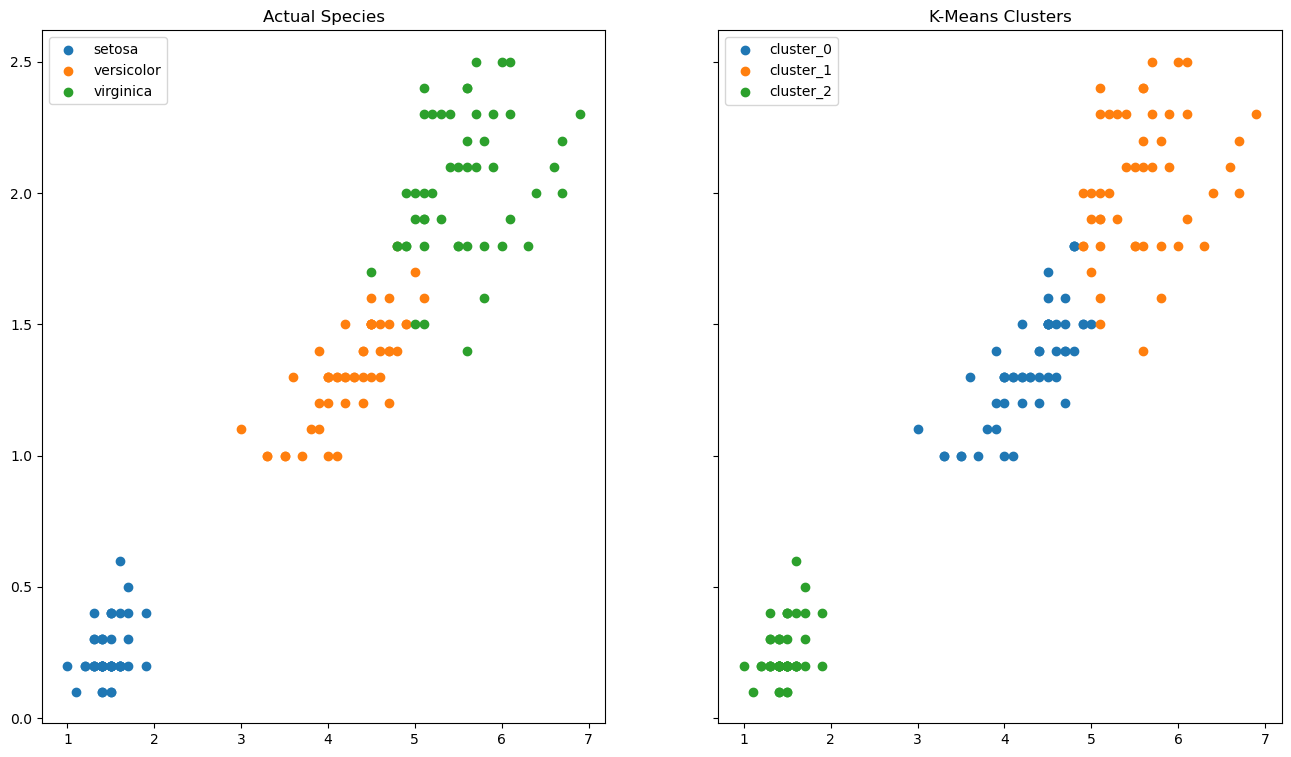

In [8]:
fig, axs = plt.subplots(1, 2, 
                        figsize=(16, 9), 
                        sharex=True, sharey=True)

for species, subset in df.groupby('species'):
    axs[0].scatter(
        subset.petal_length, 
        subset.petal_width, 
        label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in df.cluster.sort_values().unique():
    axs[1].scatter(
        df[df.cluster == cluster_n].petal_length, 
        df[df.cluster == cluster_n].petal_width, 
        label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

Text(0.5, 1.0, 'Change in inertia as k increases')

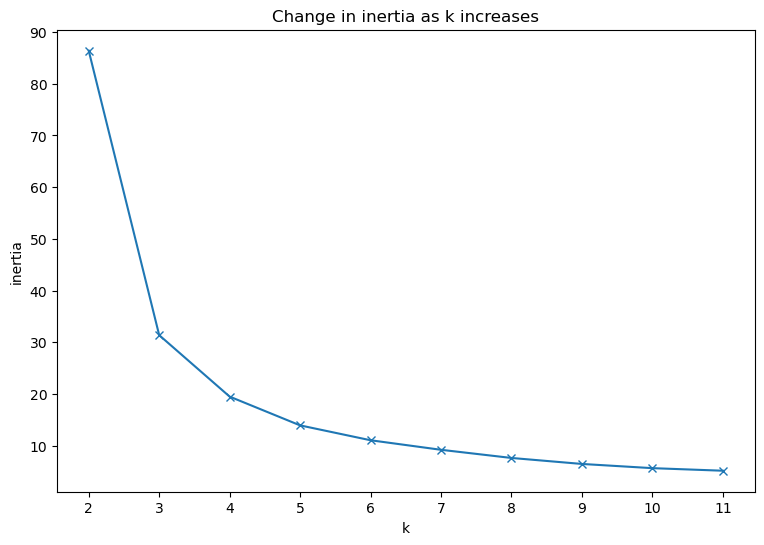

In [9]:
plt.figure(figsize=(9, 6))
pd.Series(
    {k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}
).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')

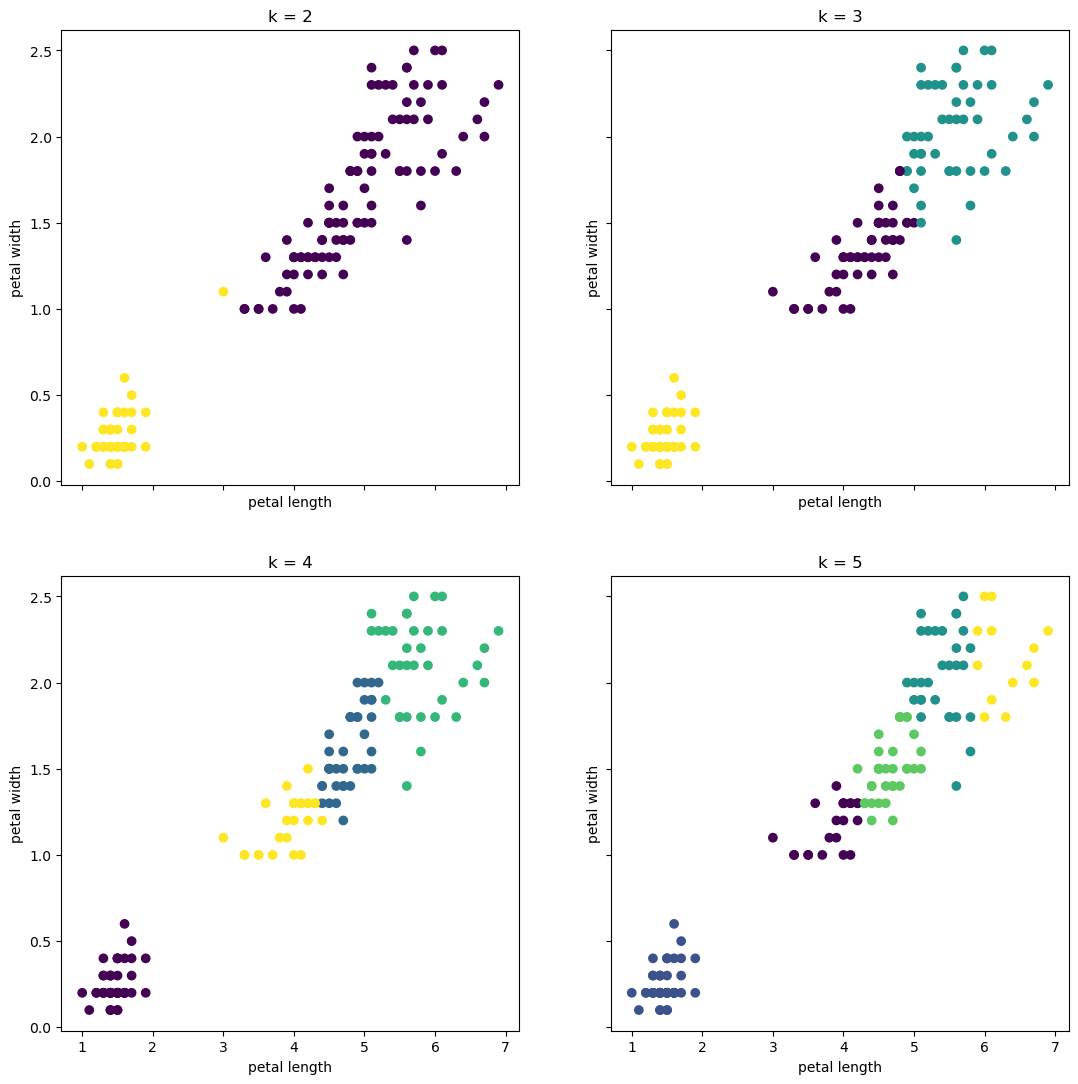

In [10]:
fig, axs = plt.subplots(
    2, 2, figsize=(13, 13), 
    sharex=True, 
    sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.petal_length, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal length', ylabel='petal width')
    

In [11]:

X = df[['petal_length', 'petal_width', 'sepal_length']]
X.head()

,petal_length,petal_width,sepal_length
1,1.4,0.2,5.1
2,1.4,0.2,4.9
3,1.3,0.2,4.7
4,1.5,0.2,4.6
5,1.4,0.2,5.0


In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [13]:
df['three_feature_cluster'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,three_feature_cluster
1,5.1,3.5,1.4,0.2,setosa,2,0
2,4.9,3.0,1.4,0.2,setosa,2,0
3,4.7,3.2,1.3,0.2,setosa,2,0
4,4.6,3.1,1.5,0.2,setosa,2,0
5,5.0,3.6,1.4,0.2,setosa,2,0


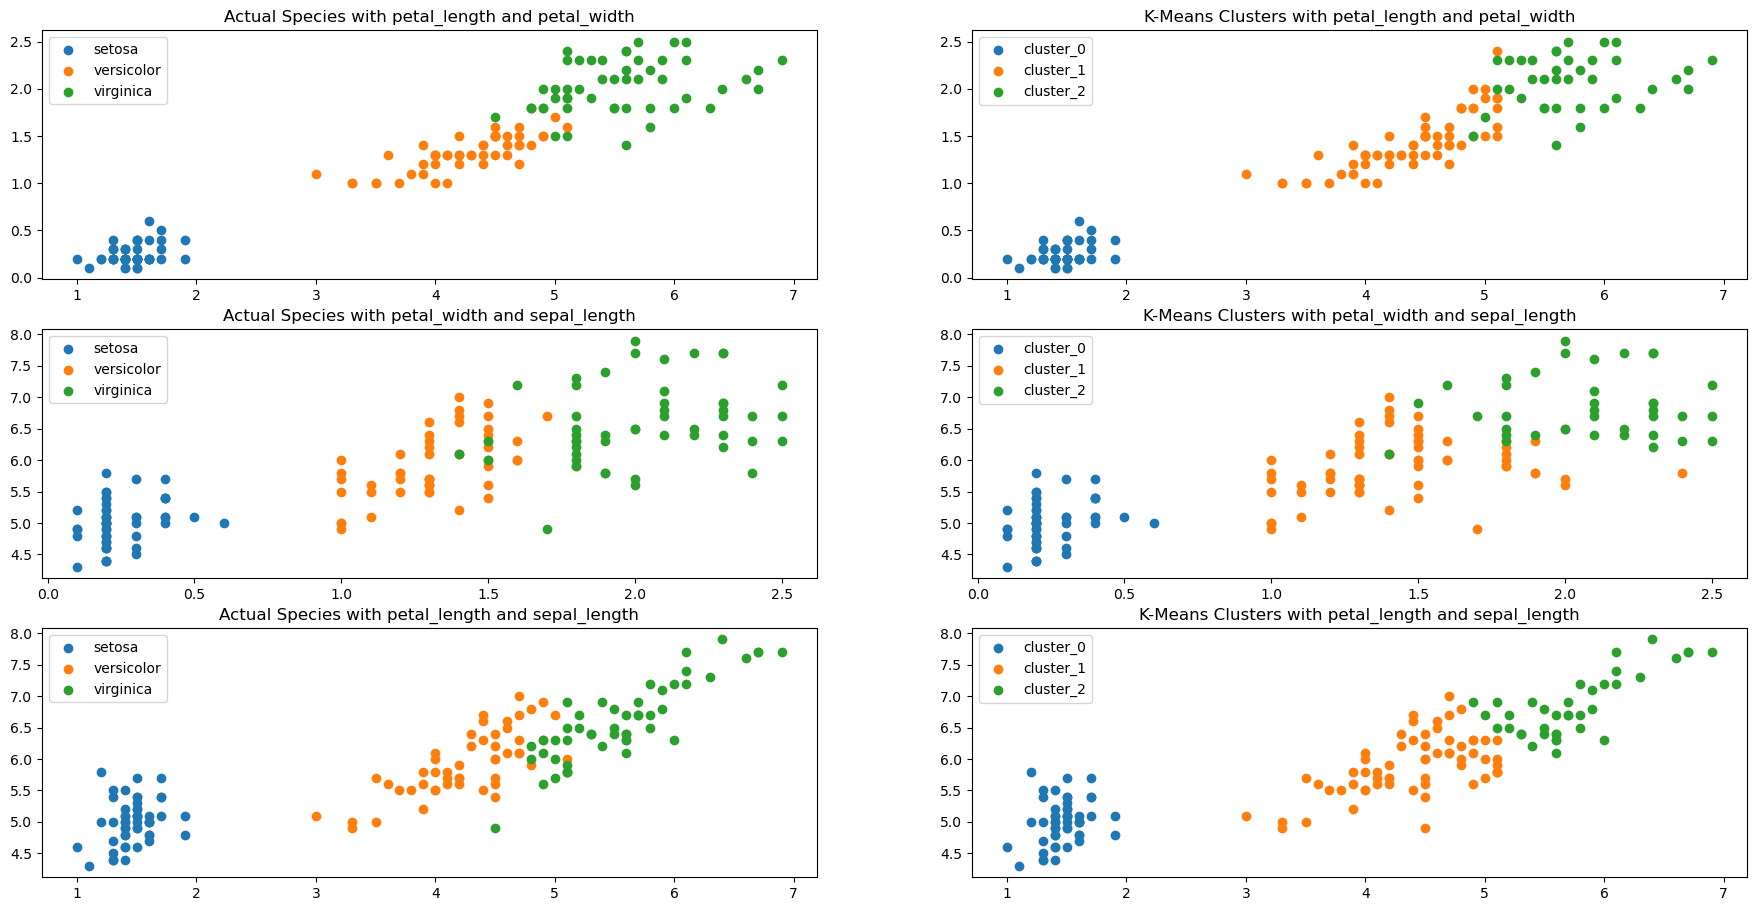

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(22, 11))

for species, subset in df.groupby('species'):
    axs[0,0].scatter(subset.petal_length, subset.petal_width, label=species)
    
axs[0,0].legend()
axs[0,0].set(title='Actual Species with petal_length and petal_width')
    
for cluster_n in df.three_feature_cluster.sort_values().unique():
    axs[0,1].scatter(df[df.three_feature_cluster == cluster_n].petal_length, df[df.three_feature_cluster == cluster_n].petal_width, label=f'cluster_{cluster_n}')

axs[0,1].legend()
axs[0,1].set(title="K-Means Clusters with petal_length and petal_width")

for species, subset in df.groupby('species'):
    axs[1,0].scatter(subset.petal_width, subset.sepal_length, label=species)
    
axs[1,0].legend()
axs[1,0].set(title='Actual Species with petal_width and sepal_length')

for cluster_n in df.three_feature_cluster.sort_values().unique():
    axs[1,1].scatter(df[df.three_feature_cluster == cluster_n].petal_width, df[df.three_feature_cluster == cluster_n].sepal_length, label=f'cluster_{cluster_n}')

axs[1,1].legend()
axs[1,1].set(title="K-Means Clusters with petal_width and sepal_length")

for species, subset in df.groupby('species'):
    axs[2,0].scatter(subset.petal_length, subset.sepal_length, label=species)
    
axs[2,0].legend()
axs[2,0].set(title='Actual Species with petal_length and sepal_length')

for cluster_n in df.three_feature_cluster.sort_values().unique():
    axs[2,1].scatter(df[df.three_feature_cluster == cluster_n].petal_length, df[df.three_feature_cluster == cluster_n].sepal_length, label=f'cluster_{cluster_n}')

axs[2,1].legend()
axs[2,1].set(title="K-Means Clusters with petal_length and sepal_length")

plt.show()

### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!



In [15]:
import wrangle_mall as wm

In [16]:
train, val, test = wm.wrangle_mall(summarization=False)
train.head()

,gender,age,annual_income,spending_score,age_scaled,annual_income_scaled,spending_score_scaled,is_male
customer_id,,,,,,,,
38,Female,30,34,73,0.230769,0.155738,0.734694,False
165,Male,50,85,26,0.615385,0.573770,0.255102,True
58,Male,69,44,46,0.980769,0.237705,0.459184,True
166,Female,36,85,75,0.346154,0.573770,0.755102,False
8,Female,23,18,94,0.096154,0.024590,0.948980,False


In [17]:
X = train[['age', 'annual_income']]
X.head()

,age,annual_income
customer_id,,
38,30,34
165,50,85
58,69,44
166,36,85
8,23,18


In [18]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([4, 1, 0, 3, 4, 2, 3, 0, 3, 3, 1, 2, 3, 4, 3, 1, 0, 4, 4, 1, 3, 1,
       0, 1, 3, 1, 0, 4, 3, 3, 1, 4, 1, 1, 4, 1, 1, 4, 3, 4, 2, 1, 1, 4,
       3, 1, 4, 0, 3, 4, 3, 3, 1, 3, 3, 4, 0, 2, 4, 0, 4, 4, 3, 4, 0, 0,
       4, 2, 0, 3, 3, 4, 3, 3, 4, 3, 2, 2, 0, 0, 1, 3, 1, 1, 3, 3, 3, 4,
       4, 3, 3, 2, 0, 2, 3, 0, 0, 0, 3, 1, 1, 1, 2, 3, 1, 3, 2, 3, 2, 3,
       0, 3], dtype=int32)

In [19]:
train['cluster'] = clusters
train.head()

,gender,age,annual_income,spending_score,age_scaled,annual_income_scaled,spending_score_scaled,is_male,cluster
customer_id,,,,,,,,,
38,Female,30,34,73,0.230769,0.155738,0.734694,False,4
165,Male,50,85,26,0.615385,0.573770,0.255102,True,1
58,Male,69,44,46,0.980769,0.237705,0.459184,True,0
166,Female,36,85,75,0.346154,0.573770,0.755102,False,3
8,Female,23,18,94,0.096154,0.024590,0.948980,False,4


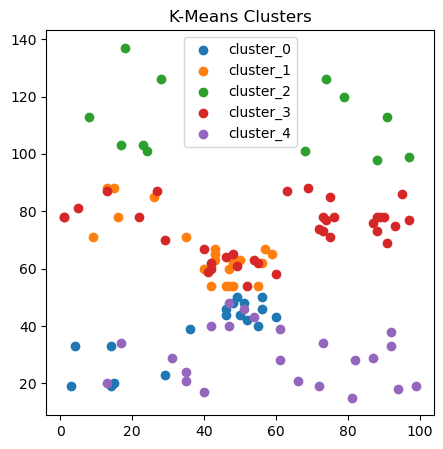

In [20]:
plt.figure(figsize=(5, 5))

for cluster_n in train.cluster.sort_values().unique():
    plt.scatter(train[train.cluster == cluster_n].spending_score, train[train.cluster == cluster_n].annual_income, label=f'cluster_{cluster_n}')

plt.legend()
plt.title("K-Means Clusters")
plt.show()

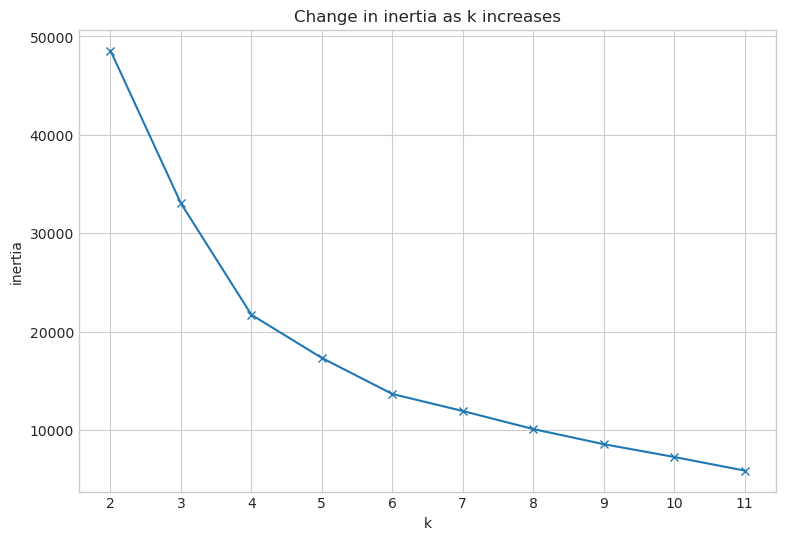

In [21]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

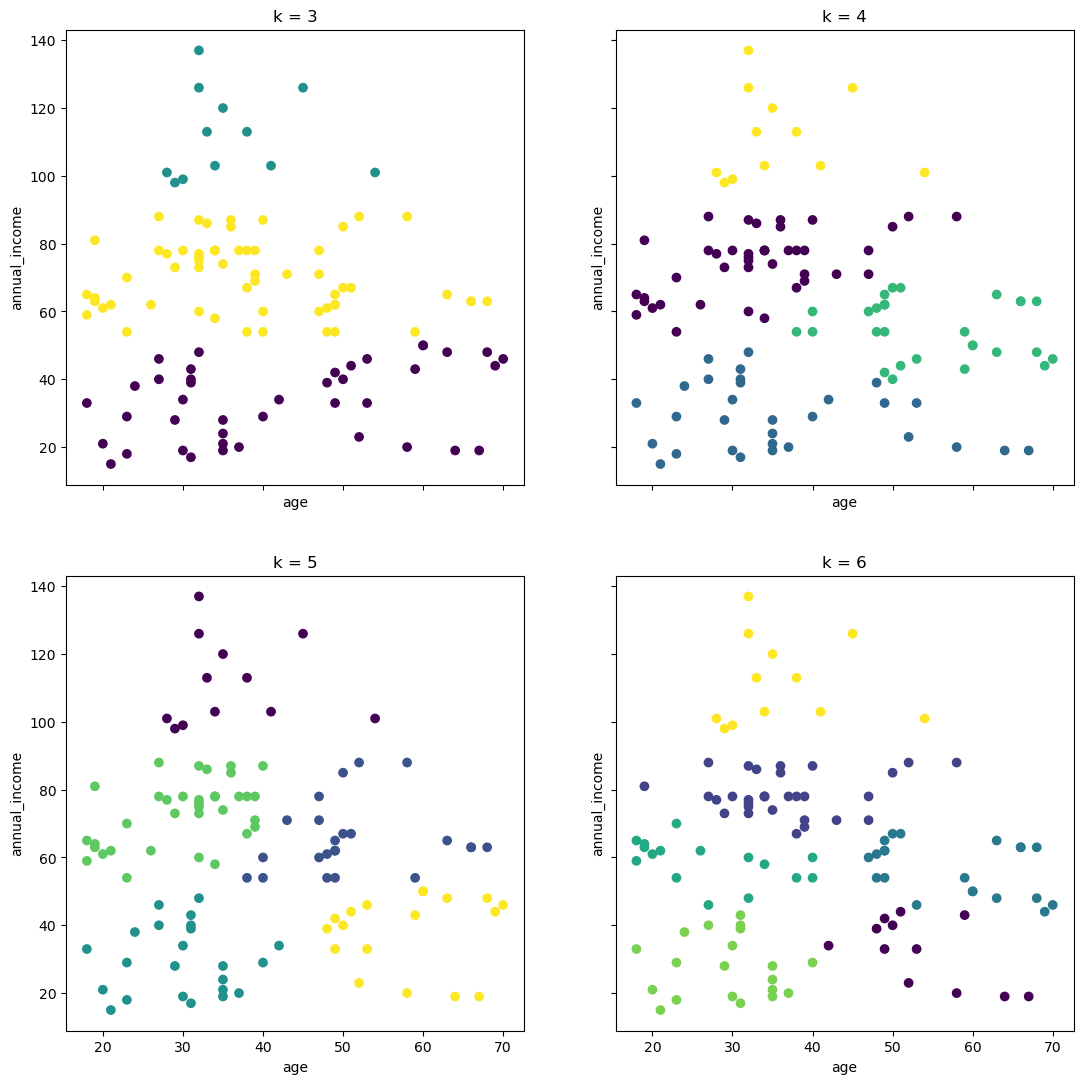

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 7)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.age, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='annual_income')

### 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [23]:
train_scaled = train.drop(columns=['annual_income','age', 'cluster']).copy()

In [24]:
X = train_scaled[['age_scaled', 'annual_income_scaled']]
X.head()

,age_scaled,annual_income_scaled
customer_id,,
38,0.230769,0.155738
165,0.615385,0.573770
58,0.980769,0.237705
166,0.346154,0.573770
8,0.096154,0.024590


In [25]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([2, 0, 1, 4, 2, 3, 4, 1, 4, 0, 0, 3, 4, 2, 4, 1, 1, 2, 2, 1, 4, 0,
       1, 0, 4, 0, 1, 2, 0, 4, 0, 2, 0, 0, 2, 0, 0, 2, 4, 2, 3, 0, 0, 2,
       4, 0, 2, 1, 4, 2, 4, 4, 0, 4, 4, 2, 1, 3, 2, 1, 2, 2, 4, 2, 1, 1,
       2, 3, 1, 0, 4, 2, 4, 0, 2, 4, 3, 3, 1, 1, 1, 0, 1, 1, 4, 4, 4, 2,
       2, 4, 4, 3, 1, 3, 4, 1, 1, 1, 0, 0, 0, 0, 3, 4, 0, 4, 0, 4, 3, 4,
       1, 0], dtype=int32)

In [26]:
train_scaled = train_scaled.assign(cluster=clusters)
train_scaled.head()

,gender,spending_score,age_scaled,annual_income_scaled,spending_score_scaled,is_male,cluster
customer_id,,,,,,,
38,Female,73,0.230769,0.155738,0.734694,False,2
165,Male,26,0.615385,0.573770,0.255102,True,0
58,Male,46,0.980769,0.237705,0.459184,True,1
166,Female,75,0.346154,0.573770,0.755102,False,4
8,Female,94,0.096154,0.024590,0.948980,False,2


In [27]:
train_scaled = train_scaled.assign(spending_score = train.loc[:,'spending_score'].copy())

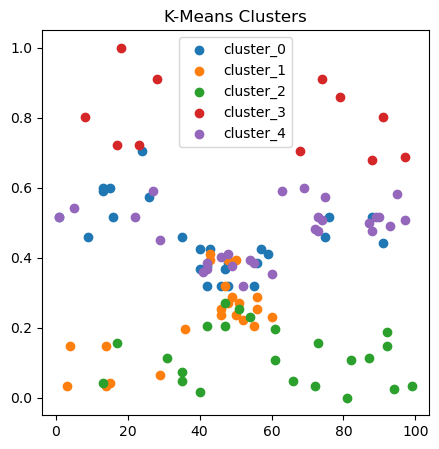

In [28]:
plt.figure(figsize=(5, 5))

for cluster_n in train_scaled.cluster.sort_values().unique():
    plt.scatter(train_scaled[train_scaled.cluster == cluster_n].spending_score, 
                train_scaled[train_scaled.cluster == cluster_n].annual_income_scaled, 
                label=f'cluster_{cluster_n}'
               )

plt.legend()
plt.title("K-Means Clusters")
plt.show()

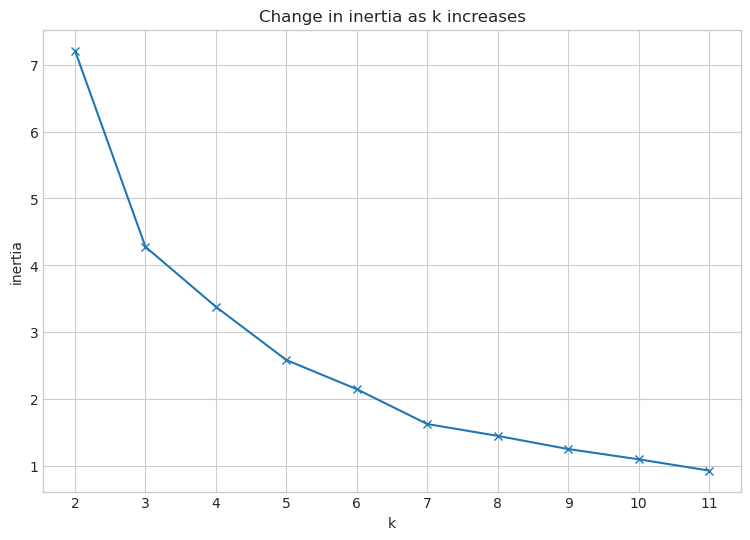

In [29]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

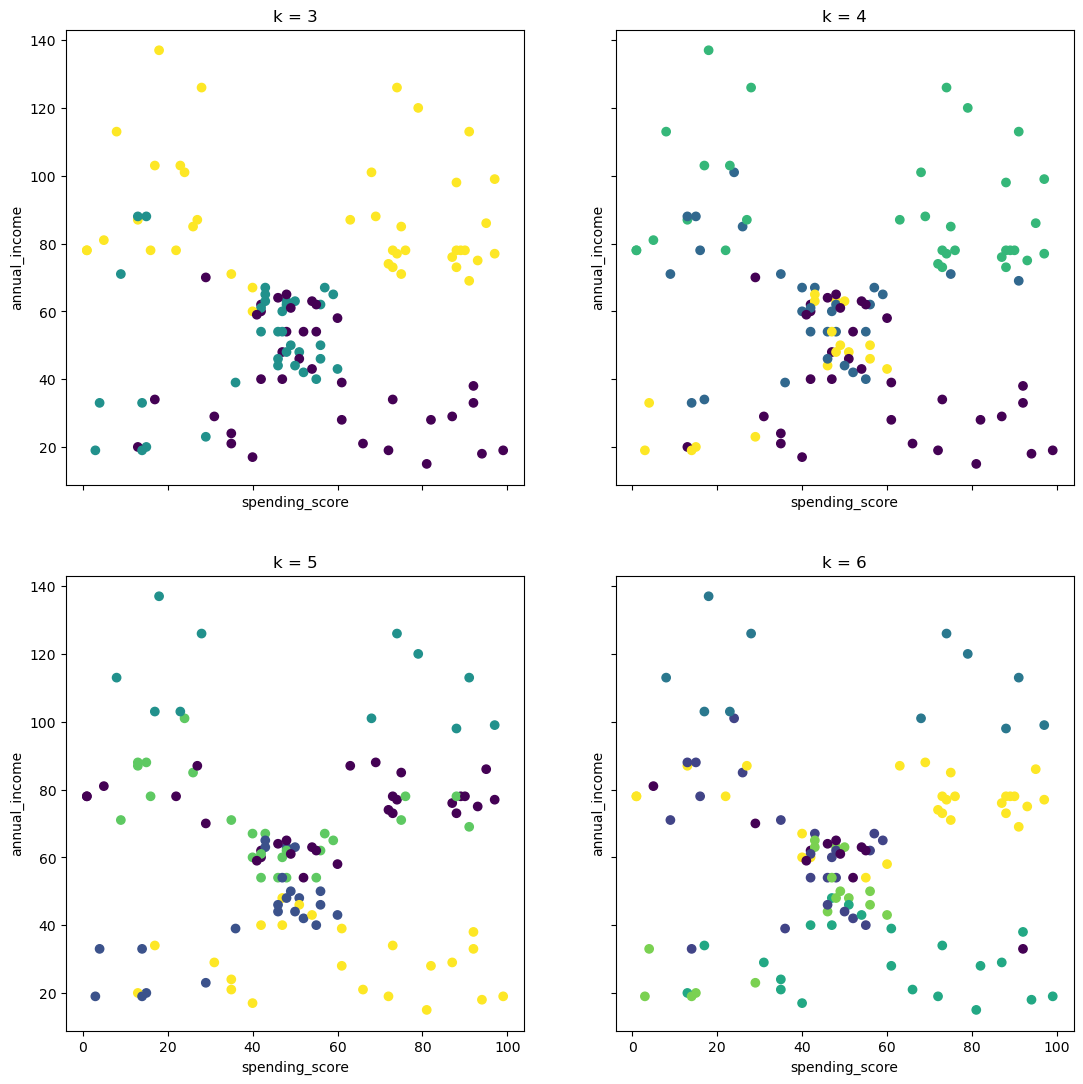

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 7)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(train.spending_score, train.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='spending_score', ylabel='annual_income')

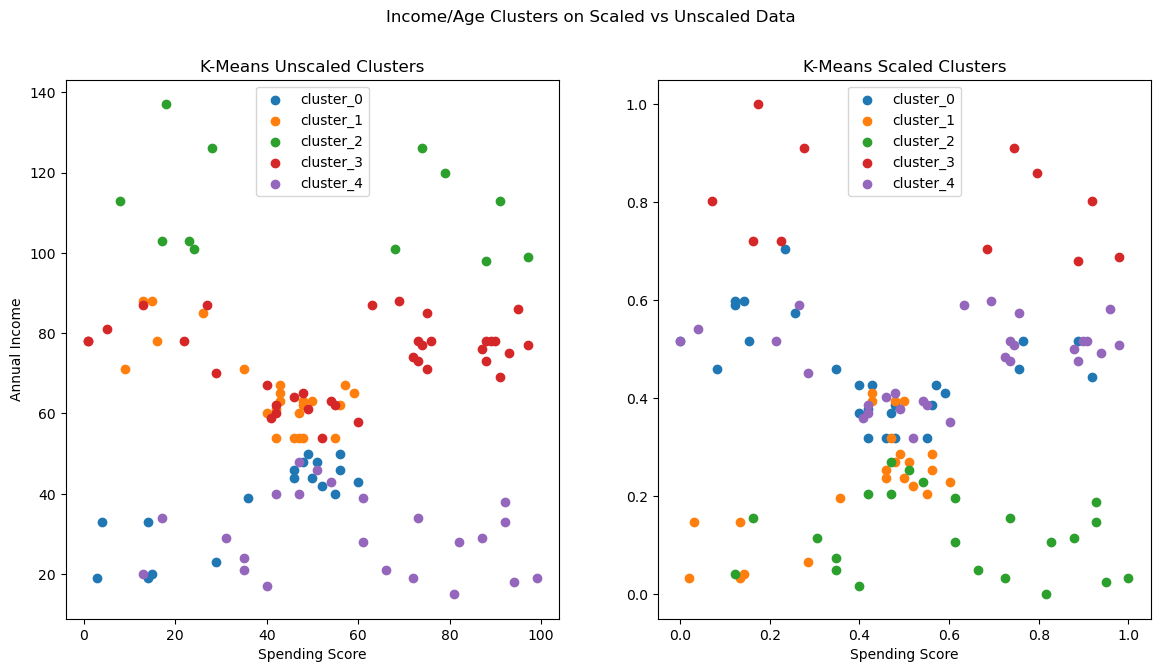

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle('Income/Age Clusters on Scaled vs Unscaled Data')

for cluster_n in train.cluster.sort_values().unique():
    axs[0].scatter(train[train.cluster == cluster_n].spending_score, 
                train[train.cluster == cluster_n].annual_income, 
                label=f'cluster_{cluster_n}'
               )
axs[0].legend()
axs[0].set(title='K-Means Unscaled Clusters', ylabel='Annual Income', xlabel='Spending Score')

for cluster_n in train_scaled.cluster.sort_values().unique():
    axs[1].scatter(train_scaled[train_scaled.cluster == cluster_n].spending_score_scaled, 
                train_scaled[train_scaled.cluster == cluster_n].annual_income_scaled, 
                label=f'cluster_{cluster_n}'
               )
axs[1].legend()
axs[1].set(title="K-Means Scaled Clusters", xlabel='Spending Score')
plt.show()